In [224]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json
import myconfig

## load data and drop columns

In [225]:
song_cluster = pd.read_csv('list_of_songs.csv')

In [226]:
song_cluster = pd.DataFrame(song_cluster)
song_cluster

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id_other,name_other,id_caller.1,name_caller.1,id_other.1,name_other.1,id_caller.2,name,id_other.2,artist
0,0.747,0.716,11,-2.457,0,0.0750,0.135000,0.000000,0.2510,0.7510,...,2EBCVPNAG46nbgs6jXPGvv,Starships,2EBCVPNAG46nbgs6jXPGvv,Starships,2EBCVPNAG46nbgs6jXPGvv,Starships,2EBCVPNAG46nbgs6jXPGvv,Starships,2EBCVPNAG46nbgs6jXPGvv,Nicki Minaj
1,0.647,0.933,7,-4.056,1,0.1110,0.000351,0.002770,0.3340,0.3320,...,5b3Qc27BoDWebXdgtMO9hr,Wild Strawberries,5b3Qc27BoDWebXdgtMO9hr,Wild Strawberries,5b3Qc27BoDWebXdgtMO9hr,Wild Strawberries,5b3Qc27BoDWebXdgtMO9hr,Wild Strawberries,5b3Qc27BoDWebXdgtMO9hr,PNAU
2,0.734,0.809,10,-7.264,0,0.0839,0.026600,0.000000,0.0642,0.2540,...,34dx8DACTJsc3rsJdaEIQw,Papaoutai,34dx8DACTJsc3rsJdaEIQw,Papaoutai,34dx8DACTJsc3rsJdaEIQw,Papaoutai,34dx8DACTJsc3rsJdaEIQw,Papaoutai,34dx8DACTJsc3rsJdaEIQw,Stromae
3,0.692,0.711,0,-7.498,0,0.0317,0.225000,0.000000,0.1200,0.8750,...,1TfqLAPs4K3s2rJMoCokcS,Sweet Dreams (Are Made of This) - Remastered,1TfqLAPs4K3s2rJMoCokcS,Sweet Dreams (Are Made of This) - Remastered,1TfqLAPs4K3s2rJMoCokcS,Sweet Dreams (Are Made of This) - Remastered,1TfqLAPs4K3s2rJMoCokcS,Sweet Dreams (Are Made of This) - Remastered,1TfqLAPs4K3s2rJMoCokcS,Eurythmics
4,0.317,0.887,9,-7.292,1,0.0375,0.000582,0.002580,0.0891,0.8710,...,4PRGxHpCpF2yoOHYKQIEwD,Rock and Roll - Remaster,4PRGxHpCpF2yoOHYKQIEwD,Rock and Roll - Remaster,4PRGxHpCpF2yoOHYKQIEwD,Rock and Roll - Remaster,4PRGxHpCpF2yoOHYKQIEwD,Rock and Roll - Remaster,4PRGxHpCpF2yoOHYKQIEwD,Led Zeppelin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0.545,0.953,7,-5.172,1,0.0441,0.000941,0.117000,0.2810,0.5580,...,6pWgRkpqVfxnj3WuIcJ7WP,Cornfield Chase,6pWgRkpqVfxnj3WuIcJ7WP,Cornfield Chase,6pWgRkpqVfxnj3WuIcJ7WP,Cornfield Chase,6pWgRkpqVfxnj3WuIcJ7WP,Cornfield Chase,6pWgRkpqVfxnj3WuIcJ7WP,Hans Zimmer
9995,0.337,0.977,9,-1.995,1,0.0976,0.004920,0.872000,0.2600,0.0582,...,144adL7pGHEWRwute2wxzZ,Omen,144adL7pGHEWRwute2wxzZ,Omen,144adL7pGHEWRwute2wxzZ,Omen,144adL7pGHEWRwute2wxzZ,Omen,144adL7pGHEWRwute2wxzZ,The Prodigy
9996,0.726,0.903,7,-2.277,0,0.0357,0.055000,0.000225,0.1580,0.9580,...,28d1X9lfagOD4iFULH4qEK,Dark Star - Homemade Weapons Remix,28d1X9lfagOD4iFULH4qEK,Dark Star - Homemade Weapons Remix,28d1X9lfagOD4iFULH4qEK,Dark Star - Homemade Weapons Remix,28d1X9lfagOD4iFULH4qEK,Dark Star - Homemade Weapons Remix,28d1X9lfagOD4iFULH4qEK,Quadrant
9997,0.645,0.891,6,-2.505,0,0.0387,0.093200,0.000004,0.3790,0.5680,...,5HiSc2ZCGn8L3cH3qSwzBT,러시안 룰렛 Russian Roulette,5HiSc2ZCGn8L3cH3qSwzBT,러시안 룰렛 Russian Roulette,5HiSc2ZCGn8L3cH3qSwzBT,러시안 룰렛 Russian Roulette,5HiSc2ZCGn8L3cH3qSwzBT,러시안 룰렛 Russian Roulette,5HiSc2ZCGn8L3cH3qSwzBT,Red Velvet


In [227]:
#create separate dataframe for song name and id
data = [song_cluster["name_caller"], song_cluster["id_caller.1"],song_cluster["artist"] ]
headers = ["name", "id", "artist"]

song_df = pd.concat(data, axis=1, keys=headers)
song_df

,name,id,artist
0,Starships,2EBCVPNAG46nbgs6jXPGvv,Nicki Minaj
1,Wild Strawberries,5b3Qc27BoDWebXdgtMO9hr,PNAU
2,Papaoutai,34dx8DACTJsc3rsJdaEIQw,Stromae
3,Sweet Dreams (Are Made of This) - Remastered,1TfqLAPs4K3s2rJMoCokcS,Eurythmics
4,Rock and Roll - Remaster,4PRGxHpCpF2yoOHYKQIEwD,Led Zeppelin
...,...,...,...
9994,Cornfield Chase,6pWgRkpqVfxnj3WuIcJ7WP,Hans Zimmer
9995,Omen,144adL7pGHEWRwute2wxzZ,The Prodigy
9996,Dark Star - Homemade Weapons Remix,28d1X9lfagOD4iFULH4qEK,Quadrant
9997,러시안 룰렛 Russian Roulette,5HiSc2ZCGn8L3cH3qSwzBT,Red Velvet


In [228]:
#drop unneccessary columns
song_cluster.drop(["time_signature"],axis=1, inplace=True)
song_cluster.drop(["name_other"],axis=1, inplace=True)
song_cluster.drop(["id_caller.1"],axis=1, inplace=True)
song_cluster.drop(["id_caller.2"],axis=1, inplace=True)
song_cluster.drop(["name_caller.1"],axis=1, inplace=True)
song_cluster.drop(["id_other.1"],axis=1, inplace=True)
song_cluster.drop(["id_other.2"],axis=1, inplace=True)
song_cluster.drop(["name_other.1"],axis=1, inplace=True)
song_cluster.drop(["type"],axis=1, inplace=True)
song_cluster.drop(["id_caller"],axis=1, inplace=True)
song_cluster.drop(["uri"],axis=1, inplace=True)
song_cluster.drop(["track_href"],axis=1, inplace=True)
song_cluster.drop(["analysis_url"],axis=1, inplace=True)
song_cluster.drop(["duration_ms"],axis=1, inplace=True)
song_cluster.drop(["name_caller"],axis=1, inplace=True)
song_cluster.drop(["name"],axis=1, inplace=True)
song_cluster.drop(["id_other"],axis=1, inplace=True)
song_cluster.drop(["artist"],axis=1, inplace=True)

In [229]:
X = song_cluster
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.747,0.716,11,-2.457,0,0.0750,0.135000,0.000000,0.2510,0.7510,125.008
1,0.647,0.933,7,-4.056,1,0.1110,0.000351,0.002770,0.3340,0.3320,119.921
2,0.734,0.809,10,-7.264,0,0.0839,0.026600,0.000000,0.0642,0.2540,116.024
3,0.692,0.711,0,-7.498,0,0.0317,0.225000,0.000000,0.1200,0.8750,125.135
4,0.317,0.887,9,-7.292,1,0.0375,0.000582,0.002580,0.0891,0.8710,169.613
...,...,...,...,...,...,...,...,...,...,...,...
9994,0.545,0.953,7,-5.172,1,0.0441,0.000941,0.117000,0.2810,0.5580,140.002
9995,0.337,0.977,9,-1.995,1,0.0976,0.004920,0.872000,0.2600,0.0582,169.867
9996,0.726,0.903,7,-2.277,0,0.0357,0.055000,0.000225,0.1580,0.9580,129.986
9997,0.645,0.891,6,-2.505,0,0.0387,0.093200,0.000004,0.3790,0.5680,124.915


## scaling features

In [230]:
X.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,0.601369,0.709503,5.295630,-6.721514,0.623362,0.084999,0.174097,0.094625,0.195035,0.512147,123.429337
std,0.158067,0.202777,3.608326,3.375083,0.484567,0.085282,0.249493,0.231223,0.160647,0.241746,27.141657
min,0.070900,0.002580,0.000000,-39.765000,0.000000,0.022300,0.000001,0.000000,0.012000,0.026200,51.317000
25%,0.497000,0.585000,2.000000,-8.105500,0.000000,0.036700,0.006140,0.000000,0.092750,0.325500,103.083000
50%,0.608000,0.749000,5.000000,-5.936000,1.000000,0.052100,0.050600,0.000076,0.128000,0.509000,123.539000
75%,0.715000,0.871000,8.000000,-4.479000,1.000000,0.091600,0.237000,0.013500,0.258000,0.705000,138.815500
max,0.980000,0.999000,11.000000,0.654000,1.000000,0.940000,0.995000,0.992000,0.984000,0.989000,217.531000


In [231]:
#use standard scaler on dataframe
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.747,0.716,11,-2.457,0,0.0750,0.135000,0.00000,0.2510,0.751,125.008
1,0.647,0.933,7,-4.056,1,0.1110,0.000351,0.00277,0.3340,0.332,119.921
2,0.734,0.809,10,-7.264,0,0.0839,0.026600,0.00000,0.0642,0.254,116.024
3,0.692,0.711,0,-7.498,0,0.0317,0.225000,0.00000,0.1200,0.875,125.135
4,0.317,0.887,9,-7.292,1,0.0375,0.000582,0.00258,0.0891,0.871,169.613


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.921373,0.032044,1.580970,1.263592,-1.286496,-0.117251,-0.156715,-0.409259,0.348388,0.988084,0.058167
1,0.288698,1.102237,0.472367,0.789802,0.777305,0.304897,-0.696433,-0.397278,0.865074,-0.745227,-0.129267
2,0.839125,0.490698,1.303820,-0.160741,-1.286496,-0.012887,-0.591218,-0.409259,-0.814465,-1.067896,-0.272854
3,0.573402,0.007385,-1.467687,-0.230076,-1.286496,-0.625001,0.204035,-0.409259,-0.467103,1.501045,0.062846
4,-1.799130,0.875376,1.026669,-0.169037,0.777305,-0.556988,-0.695507,-0.398100,-0.659460,1.484498,1.701664


In [232]:
X_scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03
mean,-2.727647e-16,4.996281e-16,-1.057482e-16,-2.858166e-16,5.771516e-16,5.360970e-17,-1.992272e-16,6.562530e-15,-9.011471e-17,1.652843e-16,-5.043137e-16
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-3.356143e+00,-3.486377e+00,-1.467687e+00,-9.790911e+00,-1.286496e+00,-7.352286e-01,-6.978338e-01,-4.092588e-01,-1.139417e+00,-2.010255e+00,-2.657021e+00
25%,-6.603146e-01,-6.140178e-01,-9.133860e-01,-4.100804e-01,-1.286496e+00,-5.663694e-01,-6.732284e-01,-4.092588e-01,-6.367379e-01,-7.721162e-01,-7.496725e-01
50%,4.195473e-02,1.947918e-01,-8.193394e-02,2.327507e-01,7.773052e-01,-3.857840e-01,-4.950179e-01,-4.089296e-01,-4.173022e-01,-1.301694e-02,4.040584e-03
75%,7.189170e-01,7.964673e-01,7.495181e-01,6.644653e-01,7.773052e-01,7.740596e-02,2.521355e-01,-3.508708e-01,3.919643e-01,7.977921e-01,5.669120e-01
max,2.395506e+00,1.427733e+00,1.580970e+00,2.185393e+00,7.773052e-01,1.002602e+01,3.290452e+00,3.881180e+00,4.911406e+00,1.972638e+00,3.467230e+00


## clustering the songs with k-means

In [233]:
#create 7 clusters using kmeans
kmeans = KMeans(n_clusters=7, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=7, random_state=1234)

In [234]:
kmeans.labels_

array([3, 6, 3, ..., 3, 3, 1], dtype=int32)

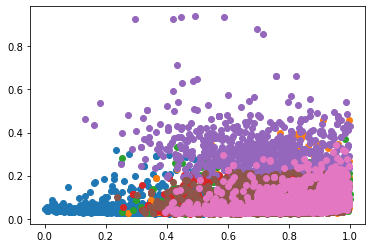

In [235]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 5])
    # show the plot
pyplot.show()

In [236]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    1244
1     594
2     790
3    2230
4     687
5    2695
6    1759
dtype: int64

In [237]:
#create dataframe from clusters
X["cluster"] = clusters
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.747,0.716,11,-2.457,0,0.0750,0.135000,0.000000,0.2510,0.7510,125.008,3
1,0.647,0.933,7,-4.056,1,0.1110,0.000351,0.002770,0.3340,0.3320,119.921,6
2,0.734,0.809,10,-7.264,0,0.0839,0.026600,0.000000,0.0642,0.2540,116.024,3
3,0.692,0.711,0,-7.498,0,0.0317,0.225000,0.000000,0.1200,0.8750,125.135,3
4,0.317,0.887,9,-7.292,1,0.0375,0.000582,0.002580,0.0891,0.8710,169.613,6
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0.545,0.953,7,-5.172,1,0.0441,0.000941,0.117000,0.2810,0.5580,140.002,6
9995,0.337,0.977,9,-1.995,1,0.0976,0.004920,0.872000,0.2600,0.0582,169.867,2
9996,0.726,0.903,7,-2.277,0,0.0357,0.055000,0.000225,0.1580,0.9580,129.986,3
9997,0.645,0.891,6,-2.505,0,0.0387,0.093200,0.000004,0.3790,0.5680,124.915,3


### show sample from a specific cluster

In [238]:
X[X['cluster'] == 3].sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
8974,0.567,0.779,4,-6.417,0,0.0504,0.203,0.000072,0.268,0.472,83.994,3


#### playing with the parameters

In [239]:
#use inertia to find the best model (mean squared distance between each instance and its closest centroid) 
kmeans.inertia_

64141.13242198137

In [240]:
kmeans2 = KMeans(n_clusters=50,
                init="k-means++",
                n_init=20,  
                max_iter=10,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

36798.633531370186


#### choosing k

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

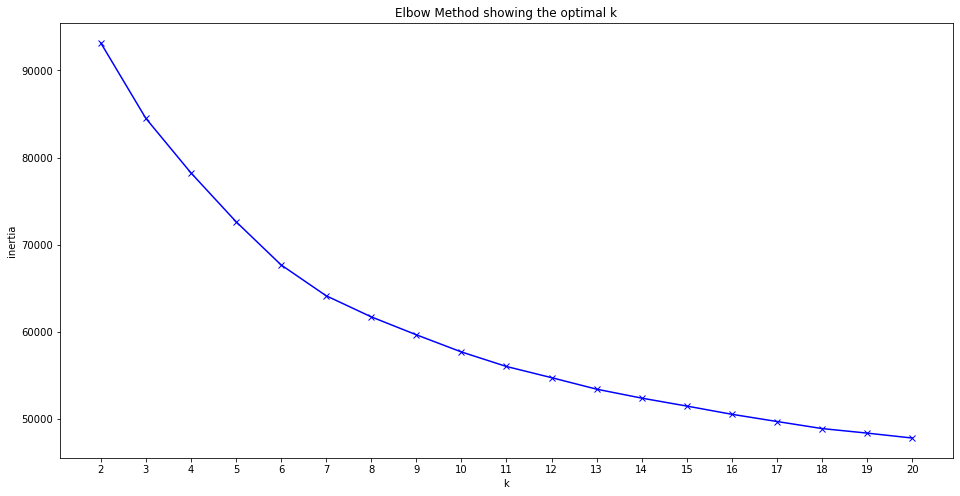

In [241]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

#### saving with pickle

In [242]:
import pickle

#scaler = StandardScaler()
#model = KMeans()

with open("scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("kmeans_4.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [243]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 



In [244]:
scaler2 = load("scaler.pickle")

#### Silhouette

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

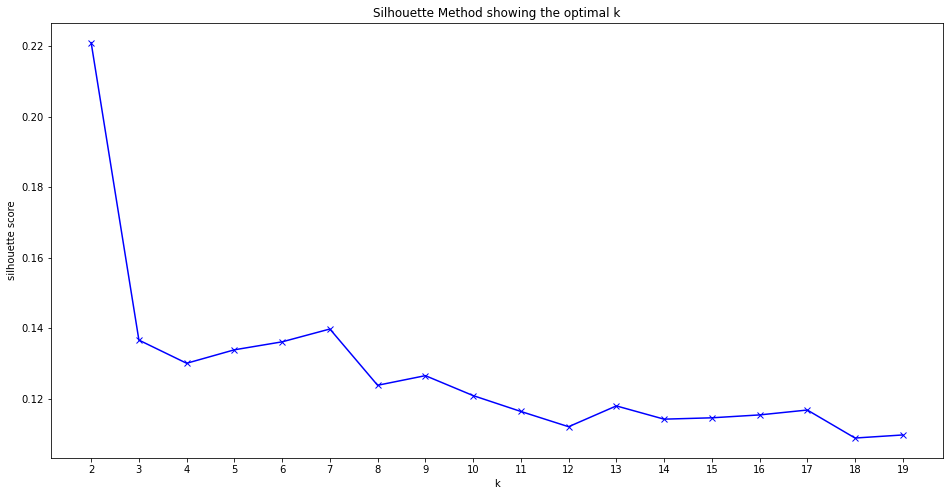

In [265]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    filename = "kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [246]:
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.747,0.716,11,-2.457,0,0.0750,0.135000,0.000000,0.2510,0.7510,125.008,3
1,0.647,0.933,7,-4.056,1,0.1110,0.000351,0.002770,0.3340,0.3320,119.921,6
2,0.734,0.809,10,-7.264,0,0.0839,0.026600,0.000000,0.0642,0.2540,116.024,3
3,0.692,0.711,0,-7.498,0,0.0317,0.225000,0.000000,0.1200,0.8750,125.135,3
4,0.317,0.887,9,-7.292,1,0.0375,0.000582,0.002580,0.0891,0.8710,169.613,6
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0.545,0.953,7,-5.172,1,0.0441,0.000941,0.117000,0.2810,0.5580,140.002,6
9995,0.337,0.977,9,-1.995,1,0.0976,0.004920,0.872000,0.2600,0.0582,169.867,2
9996,0.726,0.903,7,-2.277,0,0.0357,0.055000,0.000225,0.1580,0.9580,129.986,3
9997,0.645,0.891,6,-2.505,0,0.0387,0.093200,0.000004,0.3790,0.5680,124.915,3


In [247]:
#concatenate dataframes with name&id and audio features
spotify_songs = pd.concat([song_df, X], axis=1)

In [248]:
spotify_songs

,name,id,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,Starships,2EBCVPNAG46nbgs6jXPGvv,Nicki Minaj,0.747,0.716,11,-2.457,0,0.0750,0.135000,0.000000,0.2510,0.7510,125.008,3
1,Wild Strawberries,5b3Qc27BoDWebXdgtMO9hr,PNAU,0.647,0.933,7,-4.056,1,0.1110,0.000351,0.002770,0.3340,0.3320,119.921,6
2,Papaoutai,34dx8DACTJsc3rsJdaEIQw,Stromae,0.734,0.809,10,-7.264,0,0.0839,0.026600,0.000000,0.0642,0.2540,116.024,3
3,Sweet Dreams (Are Made of This) - Remastered,1TfqLAPs4K3s2rJMoCokcS,Eurythmics,0.692,0.711,0,-7.498,0,0.0317,0.225000,0.000000,0.1200,0.8750,125.135,3
4,Rock and Roll - Remaster,4PRGxHpCpF2yoOHYKQIEwD,Led Zeppelin,0.317,0.887,9,-7.292,1,0.0375,0.000582,0.002580,0.0891,0.8710,169.613,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,Cornfield Chase,6pWgRkpqVfxnj3WuIcJ7WP,Hans Zimmer,0.545,0.953,7,-5.172,1,0.0441,0.000941,0.117000,0.2810,0.5580,140.002,6
9995,Omen,144adL7pGHEWRwute2wxzZ,The Prodigy,0.337,0.977,9,-1.995,1,0.0976,0.004920,0.872000,0.2600,0.0582,169.867,2
9996,Dark Star - Homemade Weapons Remix,28d1X9lfagOD4iFULH4qEK,Quadrant,0.726,0.903,7,-2.277,0,0.0357,0.055000,0.000225,0.1580,0.9580,129.986,3
9997,러시안 룰렛 Russian Roulette,5HiSc2ZCGn8L3cH3qSwzBT,Red Velvet,0.645,0.891,6,-2.505,0,0.0387,0.093200,0.000004,0.3790,0.5680,124.915,3


In [249]:
print(str(spotify_songs['name'][spotify_songs['cluster'] == 0].sample()).split('    ')[1].split("\n")[0])

Goes By


## Building the Song Recommender

In [250]:
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= myconfig.client_id,
                                                           client_secret= myconfig.client_secret))

In [251]:
#import song database
spotify_songs.to_csv(r'spotify_songs.csv', index = False)

In [252]:
#import billboard hot 100
top_100 = pd.read_excel('billboard_top100.xlsx')

#input from user returns audio features from spotify
input_song = input("Please enter a song title: ")
results = sp.search(q=input_song,limit=1,market="GB")
track_id=results['tracks']['items'][0]['external_urls']["spotify"][31:]
input_dict = sp.audio_features(track_id)[0]
del input_dict["type"]
del input_dict["id"]
del input_dict["track_href"]
del input_dict["analysis_url"]
del input_dict["duration_ms"]
del input_dict["time_signature"]
del input_dict["uri"]

In [253]:
#turn audio features into list
input_list=list(input_dict.values())  
input_list

[0.591, 0.764, 1, -5.484, 1, 0.0483, 0.0383, 0, 0.103, 0.478, 169.928]

In [254]:
#turn audio features into array
input_array = np.array(input_list).reshape(1,-1)
input_array

array([[ 5.91000e-01,  7.64000e-01,  1.00000e+00, -5.48400e+00,
         1.00000e+00,  4.83000e-02,  3.83000e-02,  0.00000e+00,
         1.03000e-01,  4.78000e-01,  1.69928e+02]])

In [255]:
#scale audio features
input_array_scaled = scaler.transform(input_array)
input_array_scaled

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.06560003,  0.26876829, -1.19053669,  0.36668002,  0.77730524,
        -0.43034404, -0.54432037, -0.40925878, -0.57293039, -0.14125714,
         1.71327007]])

In [256]:
#turn audio features into dataframe
input_df = pd.DataFrame(data=input_array_scaled, index=None,columns=input_dict.keys())
input_df = pd.DataFrame(input_df)
input_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-0.0656,0.268768,-1.190537,0.36668,0.777305,-0.430344,-0.54432,-0.409259,-0.57293,-0.141257,1.71327


In [257]:
#use kmeans predict on audio features dataframe to return cluster for song input
cluster_label = kmeans.predict(input_df)
cluster_label

array([15], dtype=int32)

## Recommender Function

In [ ]:
#function to show whether song is in the hot 100 and to suggest another song from the same cluster
def user_search():
    user_input = input("Please enter a song title: ")
    from IPython.display import IFrame

    #searching for track_id of input-song
    results = sp.search(q=user_input,limit=1,market="GB")
    track_id=results['tracks']['items'][0]['external_urls']["spotify"][31:]
    
    # getting the spotify audio features of the song & deleting unnecessary features
    input_dict = sp.audio_features(track_id)[0]
    del input_dict["type"]
    del input_dict["id"]
    del input_dict["track_href"]
    del input_dict["analysis_url"]
    del input_dict["duration_ms"]
    del input_dict["time_signature"]
    del input_dict["uri"]
    
    # standard scaling 
    input_list=list(input_dict.values())  
    input_array = np.array(input_list).reshape(1,-1)
    input_array_scaled = scaler.transform(input_array)
    
    # getting cluster label for user_song
    input_df = pd.DataFrame(data=input_array_scaled, index=None,columns=input_dict.keys())
    input_df = pd.DataFrame(input_df)
    cluster_label = kmeans.predict(input_df)
    
    if top_100['song_title'].str.contains(user_input).any():
        artists_of_song = list(top_100['song_artist'][top_100['song_title'] == user_input].values)
        if len(artists_of_song) == 1:
            song_artist = artists_of_song[0]
            print("Your song is by",song_artist,"and is in the Hot100")
            print("Another song from the Top100 that you might like:", np.random.choice(top_100['song_title']))
        elif len(artists_of_song) > 1:
            song_artist1 = artists_of_song[0]
            song_artist2 = artists_of_song[1]
            print("Your song is in the Hot100, but by two different artists: ",song_artist1, "&", song_artist2)
            print("Another song from the Top100 that you might like:", np.random.choice(top_100['song_title']))
    else:
        for cluster_index in range(7):
            if cluster_label == cluster_index:
                song_recom = spotify_songs.loc[spotify_songs['cluster'] == cluster_index].sample()  
                print("Your song is not in the Hot100")
                print("Maybe you like this song: ",str(song_recom["name"]).split('    ')[1].split("\n")[0],"by",str(song_recom["artist"]).split('    ')[1].split("\n")[0])
                return IFrame(src="https://open.spotify.com/embed/track/"+str(song_recom['id']).split('    ')[1].split("\n")[0],
                           width="320",
                           height="80",
                           frameborder="0",
                           allowtransparency="true",
                           allow="encrypted-media",
                          )


In [ ]:
user_search()